In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import ipywidgets
from ipywidgets import interact
plt.style.use('seaborn-v0_8-colorblind')

In [2]:
data=pd.read_excel('data.xlsx')

In [3]:
data.shape

(2200, 8)

In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


N=ratio of nitrogen content in the soil  
P=ratio of phosphorus content in the soil  
K=ratio of potassium content in the soil  
Temperature=temp in degree celsius  
Humidity=relative humidity in percentage  
PH=pH value of the soil  
Rainfall=rainfall in mm  
Label=names of crop

In [5]:
data.isnull().any().any()

False

In [6]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [7]:
data['Nitrogen']=data['N']
data['Phospherous']=data['P']
data['Potassium']=data['K']
mean_dict={}
for i in data.columns:
    if i not in ['label','N','P','K']:
        mean_dict[f'Average {i}']=[round(data[i].mean(),2)]
mean_df=pd.DataFrame(mean_dict)
mean_df=mean_df.T
mean_df

,0
Average temperature,25.62
Average humidity,71.48
Average ph,6.47
Average rainfall,103.46
Average Nitrogen,50.55
Average Phospherous,53.36
Average Potassium,48.15


In [8]:
crop_summary_dict={}
for label in data['label'].unique():
    crop_summary_dict[label]={'Measure':[],'Value':[]} 
    for i in data.columns:        
        if i not in ['label','N','P','K']:
            crop_summary_dict[label]['Measure'].append(i.upper())
            crop_summary_dict[label]['Measure'].append('min '+i)
            crop_summary_dict[label]['Measure'].append('mean '+i)
            crop_summary_dict[label]['Measure'].append('max '+i)
            crop_summary_dict[label]['Value'].append('- - - - - -')
            crop_summary_dict[label]['Value'].append(data.loc[data['label']==label][i].min())            
            crop_summary_dict[label]['Value'].append(data.loc[data['label']==label][i].mean())            
            crop_summary_dict[label]['Value'].append(data.loc[data['label']==label][i].max())      
                   

In [9]:
@interact
def summary(crops = list(data.sort_values(by='label')['label'].unique())):
    df=pd.DataFrame(crop_summary_dict[crops])
    df.set_index('Measure')
    display(df)

interactive(children=(Dropdown(description='crops', options=('apple', 'banana', 'blackgram', 'chickpea', 'coco…

In [10]:
@interact
def avg_by_crop(measure=sorted([i for i in data.columns if i not in ['N','P','K','label']])):
    df=data.groupby('label',as_index=False)[measure].mean()
    df=df.rename(columns={measure:'average '+measure,'label':'crop'})
    df=df.sort_values(by='average '+measure,ascending=False)
    display(df)

interactive(children=(Dropdown(description='measure', options=('Nitrogen', 'Phospherous', 'Potassium', 'humidi…

In [11]:
@interact
def compare(condition=[i for i in data.columns if i not in ['N','P','K','label']]):
    print('Crops that require greater than average',condition,'\n')
    print(data[data[condition]>data[condition].mean()]['label'].unique())
    print('-'*60)
    print('Crops that require less than or equal to average',condition,'\n')
    print(data[data[condition]<=data[condition].mean()]['label'].unique())

interactive(children=(Dropdown(description='condition', options=('temperature', 'humidity', 'ph', 'rainfall', …

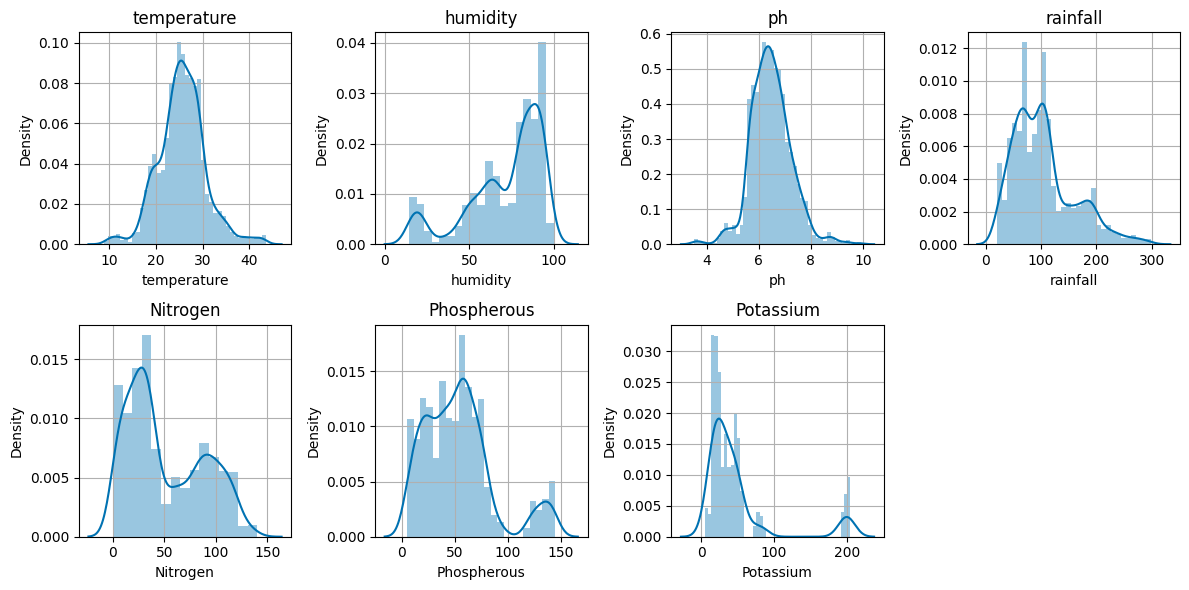

In [12]:
import warnings
warnings.filterwarnings("ignore")

plot_cols=[i for i in data.columns if i not in ['N','K','P','label']]
rows=2
cols=4
plt.figure(figsize=(cols*3,rows*3))
for k,v in enumerate(plot_cols):
    i=k+1
    plt.subplot(rows,cols,i)
    sns.distplot(data[v])
    plt.title(v)
    plt.grid()
plt.tight_layout()
plt.show()


In [13]:
#critical value=1.645 for 5% ci z 
significantly_higher={}
significantly_lower={}
for i in [metric for metric in data.columns if metric not in ['N','P','K','label']]:

    std=data[i].std()
    mean=data[i].mean()
    for lab in data['label'].unique():
        samp_mean=data.loc[data['label']==lab][i].mean()
        z=(samp_mean-mean)/std
        if z < -1.645:    
            if i not in significantly_lower.keys():significantly_lower[i]=[]
            significantly_lower[i].append(lab)
        elif z > 1.645:
            if i not in significantly_higher.keys():significantly_higher[i]=[]
            significantly_higher[i].append(lab)

def adjust_len(dict):
    mx=-float('inf')
    for v in dict.values():
        if len(v)>mx:mx=len(v)
    for v in dict.values():
        while len(v)<mx:v.append('-')
    return dict
higher_df=pd.DataFrame(adjust_len(significantly_higher))
lower_df=pd.DataFrame(adjust_len(significantly_lower))
print("Crops that require very low values *not that this is based on means and doesn't reflect variance*:")
display(lower_df)
print("Crops that require very high values: *not that this is based on means and doesn't reflect variance*")
display(higher_df)

Crops that require very low values *not that this is based on means and doesn't reflect variance*:


,humidity
0,chickpea
1,kidneybeans


Crops that require very high values: *not that this is based on means and doesn't reflect variance*


,rainfall,Nitrogen,Phospherous,Potassium
0,rice,cotton,grapes,grapes
1,-,-,apple,apple


In [14]:
# a look based on mins and maxes


In [15]:
print("Some interesting patterns")
print("-"*50)
print("Crops that require very high ration of nitrogen content in soil: ",
      data[data['N']>120]['label'].unique())
print("Crops that require very high ration of phosphorous content in soil: ",
      data[data['P']>100]['label'].unique())
print("Crops that require very high ration of potassium content in soil: ",
      data[data['K']>200]['label'].unique())
print("Crops that require very high rainfall: ", 
      data[data['rainfall']>200]['label'].unique())
print("Crops that require very low temperature: ",
      data[data['temperature']<10]['label'].unique())
print("Crops that require very high temperature: ", 
      data[data['temperature']>40]['label'].unique())
print("Crops that require very low humidity: ", 
      data[data['humidity']<20]['label'].unique())
print("Crops that require very low pH: ",
      data[data['ph']<4]['label'].unique())
print("Crops that require very high pH: ",
      data[data['ph']>9]['label'].unique())


Some interesting patterns
--------------------------------------------------
Crops that require very high ration of nitrogen content in soil:  ['cotton']
Crops that require very high ration of phosphorous content in soil:  ['grapes' 'apple']
Crops that require very high ration of potassium content in soil:  ['grapes' 'apple']
Crops that require very high rainfall:  ['rice' 'papaya' 'coconut']
Crops that require very low temperature:  ['grapes']
Crops that require very high temperature:  ['grapes' 'papaya']
Crops that require very low humidity:  ['chickpea' 'kidneybeans']
Crops that require very low pH:  ['mothbeans']
Crops that require very high pH:  ['mothbeans']


In [16]:
print("Summer Crops")
print(data[(data['temperature']>30)&(data['humidity']>50)]['label'].unique())
print('-'*60,'\nWinter Crops')
print(data[(data['temperature']<20)&(data['humidity']>30)]['label'].unique())
print('-'*60,'\nRainy Crops')
print(data[(data['rainfall']>200)&(data['humidity']>30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
------------------------------------------------------------ 
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
------------------------------------------------------------ 
Rainy Crops
['rice' 'papaya' 'coconut']


# Clustering Similar Crops 

In [17]:
import warnings 
warnings.filterwarnings('ignore')
X_cols=[i for i in data.columns if i not in ['N','P','K','label']]

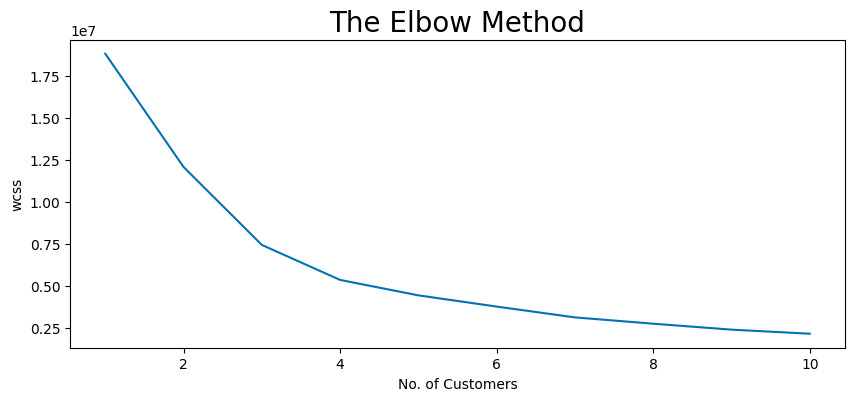

In [18]:
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize']=(10,4)
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(data[X_cols])
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize = 20)
plt.xlabel('No. of Customers')
plt.ylabel('wcss')
plt.show()

In [19]:
from sklearn.cluster import KMeans
k4=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=10)
data['4_kmeans']=k4.fit_predict(data[X_cols])

In [20]:
for i in data['4_kmeans'].unique():
    print(f'Cluster {i} contains these crops:\n{data.loc[data['4_kmeans']==i]['label'].unique()}\n')

Cluster 3 contains these crops:
['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']

Cluster 2 contains these crops:
['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']

Cluster 0 contains these crops:
['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']

Cluster 1 contains these crops:
['grapes' 'apple']



Some crops are in multiple clusters: soft clustering  
hence the next step it to 'hard cluster'

In [21]:
cluster_key=data.groupby(['label','4_kmeans'],as_index=False).size()
cluster_map = (
    cluster_key.sort_values('size', ascending=False)
               .drop_duplicates('label')
               .set_index('label')['4_kmeans']
               .to_dict()
)
data['hard_cluster']=data['label'].map(cluster_map)
data['hard_cluster'].value_counts()

hard_cluster
0    900
3    600
2    500
1    200
Name: count, dtype: int64

In [22]:
for i in data['hard_cluster'].unique():
    print(f'Hard cluster {i} contains these crops:\n{data.loc[data['hard_cluster']==i]['label'].unique()}\n')

Hard cluster 3 contains these crops:
['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']

Hard cluster 2 contains these crops:
['maize' 'banana' 'watermelon' 'muskmelon' 'cotton']

Hard cluster 0 contains these crops:
['chickpea' 'kidneybeans' 'mothbeans' 'mungbean' 'blackgram' 'lentil'
 'pomegranate' 'mango' 'orange']

Hard cluster 1 contains these crops:
['grapes' 'apple']



<Figure size 1000x400 with 0 Axes>

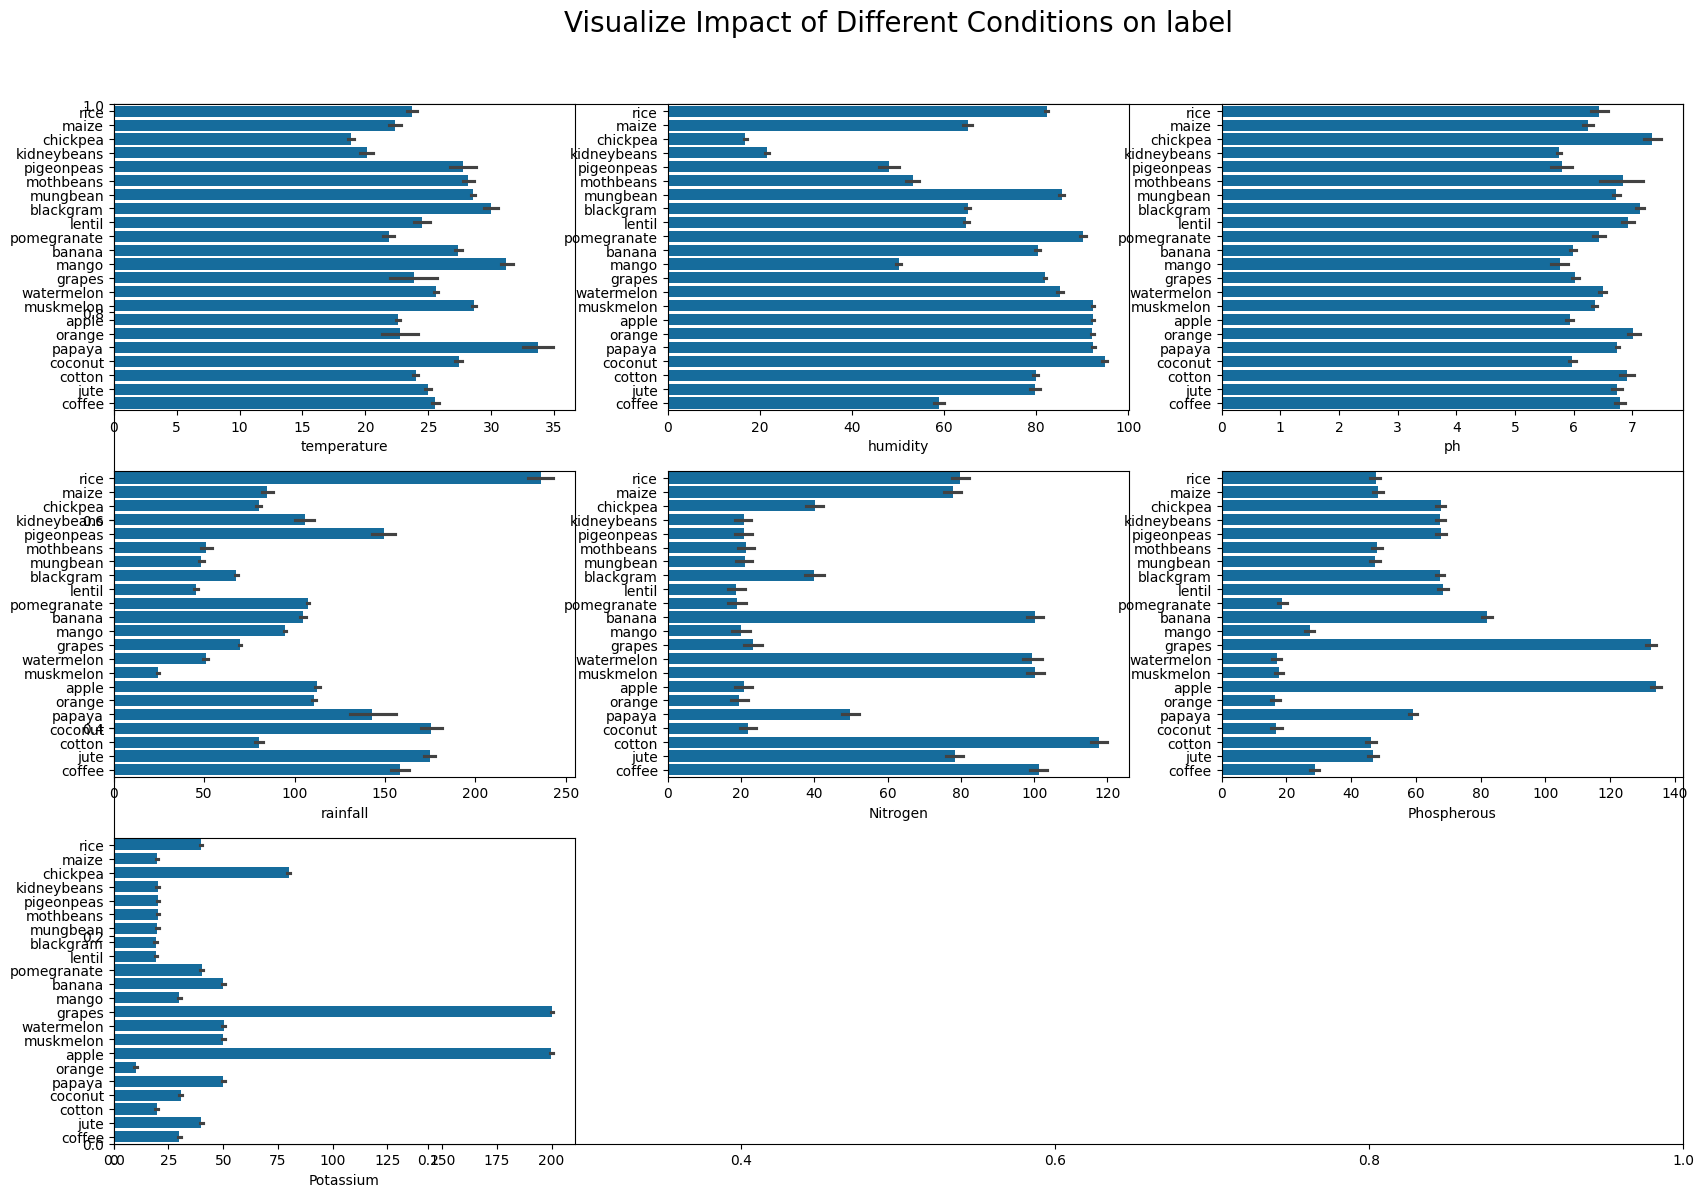

In [56]:
X_cols=['temperature', 'humidity', 'ph', 'rainfall', 
       'Nitrogen', 'Phospherous', 'Potassium']
y_c='label'
def horiz_barplots(dataframe,xcols,y_col,plot_size,maxfigwidth=20):
    num_plots=len(xcols)
    edgesize=np.ceil(np.sqrt(num_plots))*plot_size
    cols=int(min(np.ceil(edgesize/plot_size),np.ceil(maxfigwidth/plot_size)))
    rows=int(np.ceil(num_plots/cols))
    plt.figure(figsize=(cols*plot_size*1.5,rows*plot_size))
    plt.title(f'Visualize Impact of Different Conditions on {y_col}\n\n',fontsize=20)
    for i,head in enumerate(xcols):
        x=dataframe[head]
        y=dataframe[y_col].astype(str)
        plt.subplot(rows,cols,i+1)
        sns.barplot(x=x,y=y)
        plt.xlabel(head,fontsize=10)
        plt.ylabel('')
        plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()
horiz_barplots(data,X_cols,y_c,4.5)

In [55]:
y1='4_kmeans'
#horiz_barplots(data, X_cols, y1, 4.5)

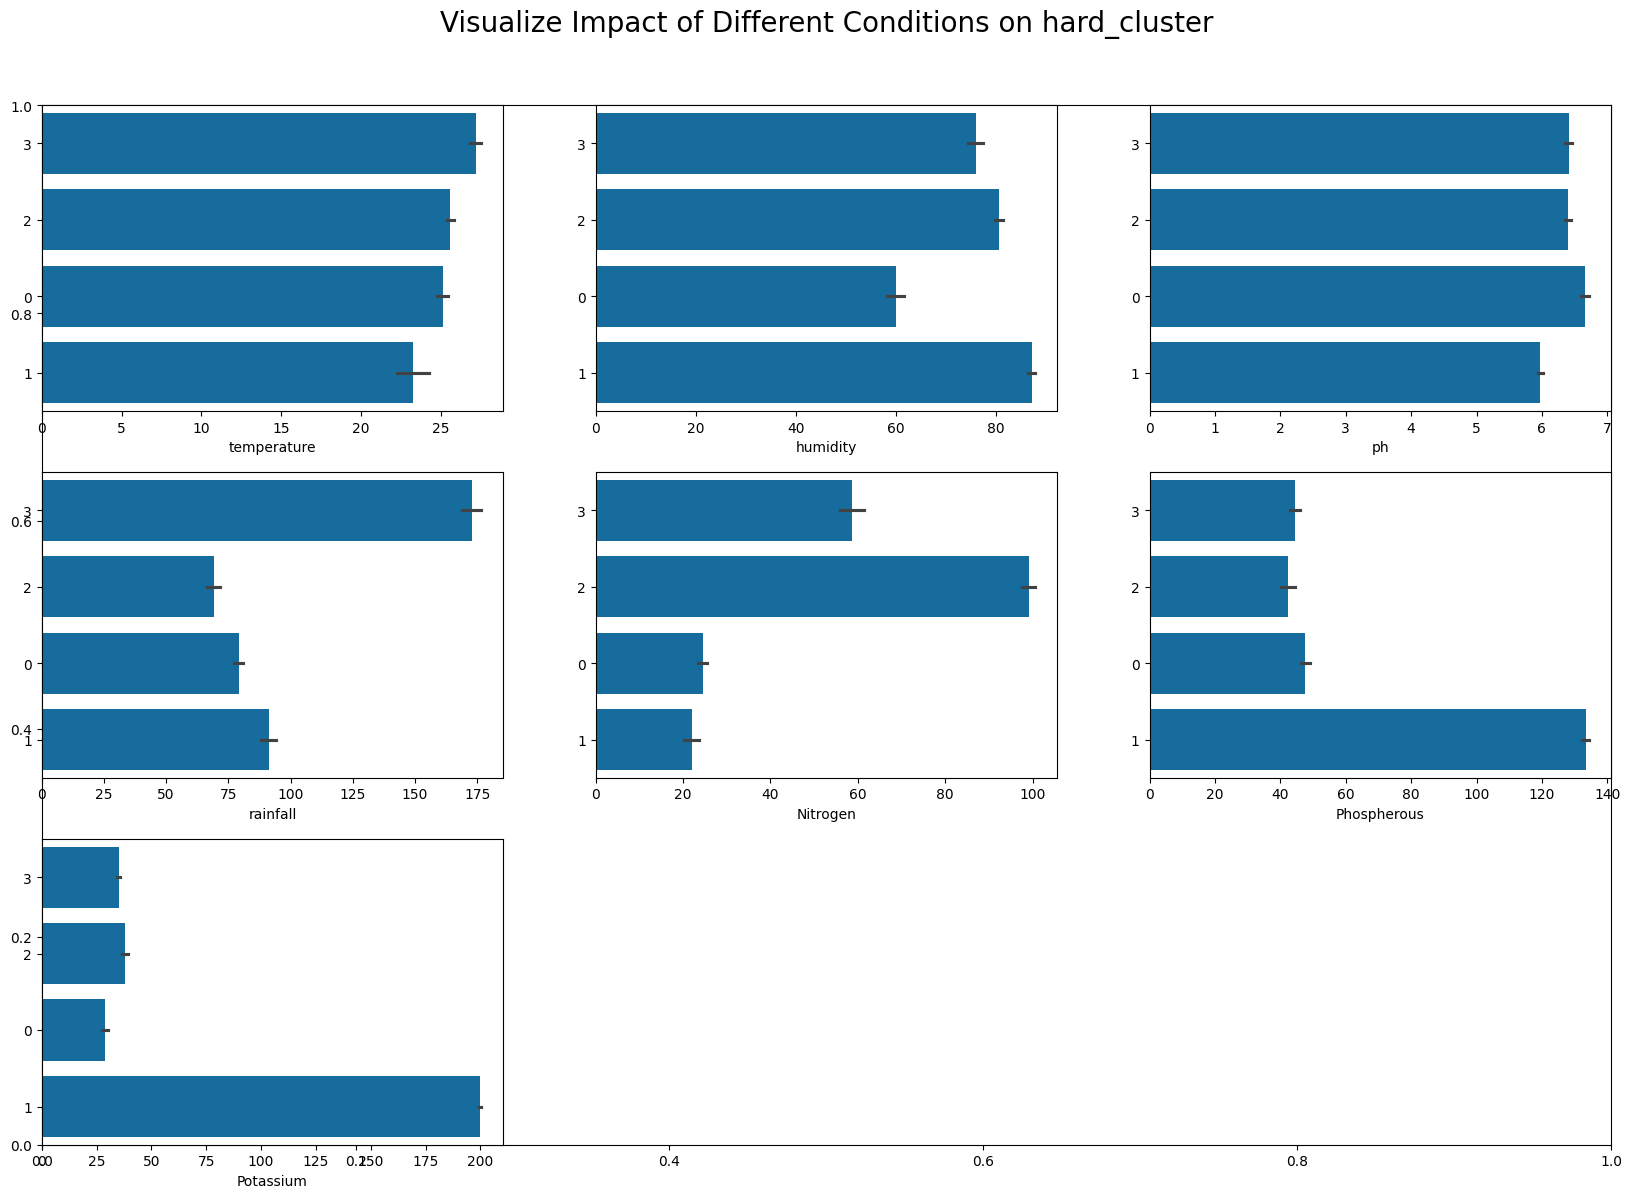

In [57]:
y2='hard_cluster'
horiz_barplots(data, X_cols, y2, 4.5)

In [60]:
X=data[['temperature', 'humidity', 'ph', 'rainfall', 
       'Nitrogen', 'Phospherous', 'Potassium' ]]
y=data['label']
print(X.shape)
print(y.shape)

(2200, 7)
(2200,)


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=43)


In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)


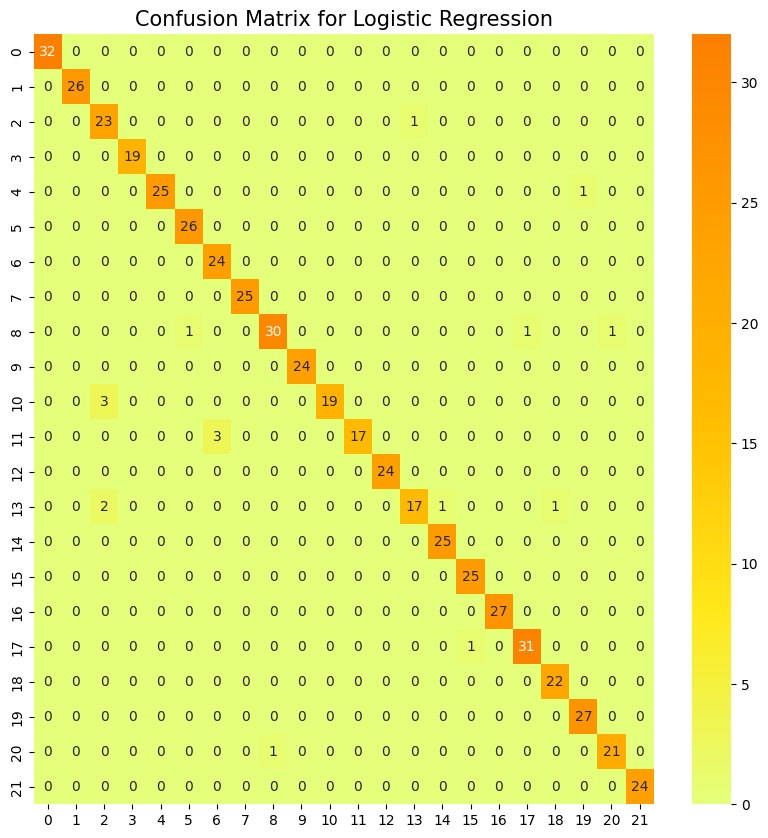

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        26
   blackgram       0.82      0.96      0.88        24
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      0.96      0.98        26
      coffee       0.96      1.00      0.98        26
      cotton       0.89      1.00      0.94        24
      grapes       1.00      1.00      1.00        25
        jute       0.97      0.91      0.94        33
 kidneybeans       1.00      1.00      1.00        24
      lentil       1.00      0.86      0.93        22
       maize       1.00      0.85      0.92        20
       mango       1.00      1.00      1.00        24
   mothbeans       0.94      0.81      0.87        21
    mungbean       0.96      1.00      0.98        25
   muskmelon       0.96      1.00      0.98        25
      orange       1.00      1.00      1.00        27
      papaya       0.97    

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,test_pred)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title('Confusion Matrix for Logistic Regression',fontsize =15)
plt.show()
cr=classification_report(y_test,test_pred)
print(cr)


In [70]:
data.sample(3)

,N,P,K,temperature,humidity,ph,rainfall,label,Nitrogen,Phospherous,Potassium,4_kmeans,hard_cluster
638,36,43,22,27.826843,87.166791,6.389882,58.372498,mungbean,36,43,22,0,0
1858,32,11,31,29.516116,92.564929,6.461226,131.211617,coconut,32,11,31,0,3
2106,109,31,27,23.059519,50.406094,6.973840,164.497187,coffee,109,31,27,3,3


real time predictions

In [75]:
crop=model.predict(np.array([[27,
                        87,
                        6,
                        58,
                        36,	
                        43,	
                        22
]]))
crop

array(['mungbean'], dtype=object)

In [74]:
crop=model.predict(np.array([[29,	
                              92,	
                              6,	
                              131,
                              32,	
                              11,	
                              31

]]))
crop

array(['coconut'], dtype=object)